<a href="https://colab.research.google.com/github/mis0225/aboutme/blob/master/Colaboratory_%E3%81%B8%E3%82%88%E3%81%86%E3%81%93%E3%81%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 新しいセクション

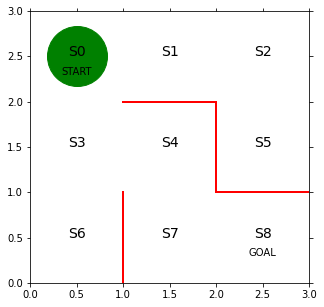

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#初期値での迷路の様子
#図の大きさ
fig = plt.figure(figsize=(5,5))
ax = plt.gca()

#赤の壁を書く
plt.plot([1,1], [0,1], color='red', linewidth=2)
plt.plot([1,2],[2,2], color='red', linewidth=2)
plt.plot([2,2],[2,1], color='red', linewidth=2)
plt.plot([2,3],[1,1], color='red', linewidth=2)

#状態を示す文字S0~S8を描く
plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

#目盛りを消す設定
ax.set_xlim(0, 3)
ax.set_ylim(0,3)
plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', right='off', left='off', labelleft='off')

#現在地に緑の〇を描く
line, =ax.plot([0.5], [2.5], marker='o', color ='g', markersize=60)


#初期の方策を決定するパラメータtheta_0を設定
#行は状態，列は移動方向を示す
theta_0 = np.array([[np.nan, 1, 1, np.nan], #S0
[np.nan, 1, np.nan, 1], #S1
[np.nan, np.nan, 1, 1], #S2
[1, 1, 1, np.nan], #S3
[np.nan, np.nan, 1, 1], #S4
[1, np.nan, np.nan, np.nan], #S5
[1, np.nan, np.nan, np.nan], #S6
[1, 1, np.nan, np.nan], #S7
])

#方策パラメータthetaを行動方策piに変換する関数の定義

def simple_convert_into_pi_from_theta(theta):
    [m,n] =theta.shape #thetaの行列サイズを取得
    pi= np.zeros((m,n))
    for i in range(0,m):
        pi[i, :] = theta[i, :]/np.nansum(theta[i, :]) #割合の計算
    
    pi = np.nan_to_num(pi) #nanを0に変換

    return pi

    #初期の方策pi_0を求める
pi_0 = simple_convert_into_pi_from_theta(theta_0)
pi_0



In [32]:

#1step移動後の状態ｓを求める関数を定義

def get_next_s(pi, s):
  direction = ['up,', 'right', 'down', 'left']

  next_direction = np.random.choice(direction, p=pi[s, :]) #pi[s, :]の確率に従って，directionが選択される

  if next_direction == 'up':
    s_next = s-3
  elif next_direction == 'right':
    s_next = s+1
  elif next_direction == 'down':
    s_next = s+3
  elif next_direction == 'left':
    s_next = s-1

  return s_next

  #GOALにたどり着くまで移動させる関数の定義
  
  def goal_maze(pi):
    s=0 #START地点
    state_history = [0] #エージェントを記録するリスト

    while(1):
      next_s = get_next_s(pi,s)
      state_history.append(next_s) #記録リストに次の状態を追加

      if next_s == 8:
        break
      else:
        s =next_s
    
    return state_history

    state_history = goal_maze(pi_0)
    #ゴールするまでのエージェントの移動がstate_historyに格納された．

    print(state_history)
    print('迷路を解くのにかかったステップ数は' + str(len(state_history)-1) + 'です')

NameError: ignored